#### About
Plane formation from a set of 2D points on image plane using voronoi diagram and triangulation.
* This plane is of utmost importance in AR-Applications

In [22]:
#importing modules
import cv2
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Check if a point is inside a rectangle
def check_point_in_rect(rect, point) :
    #checking if the point is inside the four bounds of rectangle
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

# Draw voronoi diagram
def draw_voronoi_diagram(img, subdiv) :
 
    facets, centers = subdiv.getVoronoiFacetList([])
 
    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
 
        ifacet = np.int0(np.array(ifacet_arr))
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
 
        cv2.fillConvexPoly(img, ifacet, color, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, 0)
        cv2.circle(img, (np.int0(centers[i][0]), np.int0(centers[i][1])), 15, (255, 0, 0), -1)

 
# Draw delaunay triangles
def draw_delaunay_diagram(img, subdiv) :
    #defining params
    color = (0, 255, 0)
    thickness = 9
    #fetching triangles
    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])
 
    for t in triangleList :
 
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
 
        if check_point_in_rect(r, pt1) and check_point_in_rect(r, pt2) and check_point_in_rect(r, pt3) :
 
            cv2.line(img, np.int0(pt1), np.int0(pt2), color, thickness)
            cv2.line(img, np.int0(pt2), np.int0(pt3), color, thickness)
            cv2.line(img, np.int0(pt3), np.int0(pt1), color, thickness)
 

 

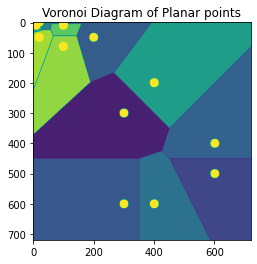

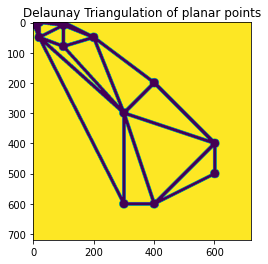

In [55]:
 # Define colors for drawing.
delaunay_color = (255,255,255)
points_color = (0, 0, 255)

#create a blank white image
img = 255* np.ones((720,720))
 
size = img.shape
rect = (0, 0, size[1], size[0])
 
# Create an instance of Subdiv2D
subdiv = cv2.Subdiv2D(rect)
 
# Create an array of points.
points = []
 
# Read in the points from a text file
with open("plane_points.txt") as file :
    for line in file :
        x, y = line.split()
        points.append((int(x), int(y)))
 
# Insert points into subdiv
for p in points :
    subdiv.insert(p)

# Draw delaunay triangles
draw_delaunay_diagram( img, subdiv)
# Draw points
for p in points :
    cv2.circle(img, p, 15, (0,255,0), -1 )

img_voronoi = np.zeros(img.shape, dtype = img.dtype)

# Draw Voronoi diagram
draw_voronoi_diagram(img_voronoi,subdiv)

plt.imshow(img_voronoi)
plt.title('Voronoi Diagram of Planar points')
plt.show()
plt.imshow(img)
plt.title('Delaunay Triangulation of planar points')
plt.show()
